SUBJECT          :    M504D Intro to AI and Applications

PROJECT TYPE    :     Individual Final Project.

PROFESSOR       :     Sami Alsalamin

STUDENT NAME    :     [Mehtab Salgotra]

STUDENT NUMBER  :     [GH1043827]

1. Business Context

I am a data science consultant hired by a higher education institution that aims to improve its student placement outcomes. The institution wants to understand how different factors such as academic performance (CGPA), internship experience, project completions, and IQ influence students’ chances of getting placed. By analyzing student profiles and placement results, the objective of this notebook is to design and implement an exploratory data analysis (EDA) pipeline to answer a set of business questions and generate actionable recommendations. These insights will help the institution better prepare students for the job market, guide curriculum design, and support decision-making in career services.

The success rate of student placement is a vital indicator of performance and one of the determinants in the attraction of the finest talent. Although giving out a good education is a basic requirement, it is how students are well-equipped to the job market that will translate academic success to career success. By determining the primary factors of placement, the institution can proactively manage students and increase their chances of getting employment.

The Exploratory Data Analysis (EDA) I will carry out in this project will be thorough to understand which factors best predict student placement outcomes. The analysis of this data will help the institution to:

Increase student readiness by treating at risk students to special interventions, such as additional project work or internship assistance.

Streamline curriculum development with an increased focus on skills and experiences with a high positive correlation with job placement.

Enhance career services through data-based evidence to offer students individual advice regarding their academic and extracurricular backgrounds.

It is mostly an Exploratory Data Analysis (EDA) project. The objective is to identify and plot connections among qualities of students and their placement achievements. The insights developed using this EDA may be later utilized to develop a binary classification model that may help predict the placement of a student.

Key Factors for Analysis (Input Features):
The analysis will focus on student-level features provided in the dataset, such as:
Academic Performance (CGPA)
Internship Experience (Number of internships)
Practical Skills (Number of projects completed)
Cognitive Ability (IQ Score)

Primary Outcome to Be Analyzed (Target Variable):
The dependent variable is the Placement Status that reflects a successful placement of a student in a job.

Challenges in the Dataset:

Data Cleaning: The dataset is specifically mentioned as unclean and as such, we can expect to encounter and deal with missing values, inconsistent values, and wrong data types.

Outlier Detection: There might be outliers or anomalies in academic scores, IQ and other numerical data that may distort the analysis unless they are dealt with.

Correlation vs. Causation: The most significant issue will be to interpret the findings appropriately, not to mistake a strong correlation and erroneously believe that one of the factors is a direct cause of the other one.

Github - https://github.com/MehtabSalgotra/M504D-Intro-to-AI-and-Applications

Video Drive link - https://drive.google.com/file/d/1ZGZsidy5xS3fXptjY6NFCO9zmpj1Bd-h/view?usp=sharing

Load Libraries & Dataset

In [27]:
import pandas as pd
import numpy as np
from scipy import stats
import os

#Visualization

import matplotlib.pyplot as plt


In [28]:
# Path to unclean dataset
file_path_unclean = r"C:\Users\mehta\.cache\kagglehub\datasets\mehtabsalgotra\college-student-placement\versions\1\CollegePlacement_unclean1.csv"


In [29]:
# Load dataset
df = pd.read_csv(file_path_unclean)
print(" Loaded unclean dataset:", df.shape)


 Loaded unclean dataset: (10015, 10)


Setup : Importing the standard Python libraries (like pandas) required for any data analysis task.

Load & Verify : Reading your local CSV file into a usable table called a DataFrame and confirms it's ready by showing its size: 10,015 rows and 10 columns.

Data Exploration

Identify missing values, duplicates, and data quality issues
Data exploration is necessary to find out the health of your data and finding out problems in the data set so that our data set would not lead to any inaccurate conclusions in the analysis process by spotting errors, outliers , missing information.


In [30]:
# Basic overview
# -----------------------------
print("\n First 5 rows:")
print(df.head())



 First 5 rows:
  College_ID     IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0011  112.0             6.85  6.53                   4.0   
1        NaN   85.0             9.16  8.81                   4.0   
2    CLG0079   95.0             6.15  6.17                   2.0   
3    CLG0003    NaN              NaN  5.55                   7.0   
4    CLG0062  112.0             7.93  7.51                   8.0   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                   Yes                     1.0                   9.0   
1                   Yes                     7.0                   9.0   
2                    No                     2.0                   NaN   
3                    No                     3.0                   4.0   
4                   Yes                     1.0                   3.0   

   Projects_Completed Placement  
0                 1.0        No  
1                 3.0       Yes  
2                 1.0        No  


In [31]:
print("\n Dataset Info:")
print(df.info())



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              9075 non-null   object 
 1   IQ                      8706 non-null   float64
 2   Prev_Sem_Result         8982 non-null   float64
 3   CGPA                    8727 non-null   float64
 4   Academic_Performance    9650 non-null   float64
 5   Internship_Experience   9264 non-null   object 
 6   Extra_Curricular_Score  8857 non-null   float64
 7   Communication_Skills    8803 non-null   float64
 8   Projects_Completed      9445 non-null   float64
 9   Placement               9532 non-null   object 
dtypes: float64(7), object(3)
memory usage: 782.6+ KB
None


In [32]:
print("\n Missing values per column:")
print(df.isnull().sum())



 Missing values per column:
College_ID                 940
IQ                        1309
Prev_Sem_Result           1033
CGPA                      1288
Academic_Performance       365
Internship_Experience      751
Extra_Curricular_Score    1158
Communication_Skills      1212
Projects_Completed         570
Placement                  483
dtype: int64


In [33]:
print("\n Duplicate rows count:", df.duplicated().sum())



 Duplicate rows count: 15


In [34]:
print("\n Numeric summary (spot outliers):")
print(df.describe())



 Numeric summary (spot outliers):
                IQ  Prev_Sem_Result         CGPA  Academic_Performance  \
count  8706.000000      8982.000000  8727.000000           9650.000000   
mean     99.398838         7.533611     7.536244              5.557571   
std      15.260325         1.474698     1.472139              2.918460   
min      42.000000         5.000000     4.540000              1.000000   
25%      89.000000         6.280000     6.290000              3.000000   
50%      99.000000         7.540000     7.550000              6.000000   
75%     109.000000         8.790000     8.770000              8.000000   
max     249.429056        26.353186    14.875670             31.389073   

       Extra_Curricular_Score  Communication_Skills  Projects_Completed  
count             8857.000000           8803.000000         9445.000000  
mean                 4.974142              5.581401            2.522821  
std                  3.181751              3.033918            1.749747  
mi

In [35]:
print("\n Unique categorical values (spot corruption):")
for col in df.select_dtypes(include="object").columns:
    print(f"\n{col}:")
    print(df[col].unique()[:10])  # first 10 unique values


 Unique categorical values (spot corruption):

College_ID:
['CLG0011' nan 'CLG0079' 'CLG0003' 'CLG0062' 'CLG0076' 'CLG0075' 'CLG0056'
 'CLG0001' 'CLG0008']

Internship_Experience:
['Yes' 'No' nan 'No??' 'eYs']

Placement:
['No' 'Yes' nan 'No??']


check-up on the dataset using several key commands:

 (df.head()): Looking at the first 5 rows to get a quick view for the data.

Technical Summary (df.info()): Checking out data type of each column and getting first look for missing or null values or any other data  issues.

Quantifying Missing Data (df.isnull().sum()): Getting the count of missing values for specified columns.

Finding Duplicates (df.duplicated().sum()):  Finding out the number of duplicate rows and removing them in further process.

Spotting Outliers (df.describe()):  The statistical summary for numerical columns is crucial for finding outliers.

Checking Categorical Data (.unique()):  Finding out unique values to remove data inconsistency.

Data Cleaning

Cleaning of data is very important since data in the real world is normally untidy. This process removes errors, gaps, and noise thus making sure that your analysis is done based on correct consistent data, and hence will achieve reliable and trustworthy results.

In [36]:
# 1. Remove duplicates
# -----------------------------
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"\n Removed {before - after} duplicate rows.")



 Removed 15 duplicate rows.


In [37]:
# 2. Handle missing values
# -----------------------------
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns


In [38]:
# Numeric → median
df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.median()))


In [39]:
# Categorical → mode
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

In [40]:
print(" Missing values filled.")


 Missing values filled.


In [41]:
# 3. Handle outliers with Z-score
# -----------------------------
for col in num_cols:
    if df[col].nunique() > 1:  # only if column has variation
        z_scores = np.abs(stats.zscore(df[col]))
        df.loc[z_scores > 3, col] = df[col].median()


In [42]:
print(" Outliers capped.")


 Outliers capped.


In [43]:
# 4. Clean categorical values
# -----------------------------
for col in cat_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace("###", "", regex=False)
    df[col] = df[col].str.replace("??", "", regex=False)
    df[col] = df[col].str.lower().str.strip()


In [44]:
print(" Cleaned categorical values.")


 Cleaned categorical values.


In [45]:
# Final Checks
# -----------------------------
print("\n Missing values after cleaning:")
print(df.isnull().sum())



 Missing values after cleaning:
College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64


In [46]:
print("\n Duplicate rows after cleaning:", df.duplicated().sum())



 Duplicate rows after cleaning: 0


In [47]:
print("\n Numeric summary after cleaning:")
print(df.describe())



 Numeric summary after cleaning:
                 IQ  Prev_Sem_Result          CGPA  Academic_Performance  \
count  10000.000000     10000.000000  10000.000000          10000.000000   
mean      99.287000         7.533083      7.539132              5.563300   
std       13.655602         1.371007      1.370221              2.819785   
min       57.000000         5.000000      4.540000              1.000000   
25%       91.000000         6.450000      6.480000              3.000000   
50%       99.000000         7.550000      7.560000              6.000000   
75%      108.000000         8.650000      8.600000              8.000000   
max      142.000000        10.000000     10.460000             10.000000   

       Extra_Curricular_Score  Communication_Skills  Projects_Completed  
count            10000.000000          10000.000000        10000.000000  
mean                 4.972600              5.616400            2.545100  
std                  2.979654              2.728772        

In [48]:
# Save cleaned dataset
# -----------------------------
cleaned_path = os.path.join(os.path.dirname(file_path_unclean), "CollegePlacement_cleaned.csv")
df.to_csv(cleaned_path, index=False)


1. Remove Duplicates : We got to know about 15 identical rows so to remove them is necessary. This is important because duplicates can unfairly bias your analysis and model training.

2. Fill Missing Values : Filling missing values with a default value to make values consistent.


3. Cap Outliers  : Identifying and neutralizing  extreme statistical outliers. Any number that is unusually far from the average  is replaced by the column's median value preventing values from skewing the results.

4. Standardize Text : Cleaning up  columns by truncating junk characters (like ??), converting text to lowercase, and trimming extra spaces. 

5. Save Clean Data : Saving up the cleaned data file to make further analysis on the data.

Feature Engineering

Adding up context that the original column lacked. We are giving ranking to students based on higher number of projects made by the students partitioned on the basis of CGPA.

In [49]:
# Feature Engineering
# -----------------------------

df['Project_Rank_in_CGPA'] = (
    df.groupby('CGPA')['Projects_Completed']
      .rank(method='dense', ascending=False)
)

In [50]:
print(df.columns.tolist())

['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Internship_Experience', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Placement', 'Project_Rank_in_CGPA']


In [51]:
# Save as a new file
df.to_csv(r"C:\Users\mehta\.cache\kagglehub\datasets\mehtabsalgotra\college-student-placement\versions\1\CollegePoject_with_rank.csv", index=False)

print(" New file created with Project_Rank_in_CGPA column")

 New file created with Project_Rank_in_CGPA column


This feature engineering creates a new column that ranks students by their project count, but only against others with the exact same CGPA. This is powerful because it measures a student's initiative relative to their academic peers, providing a richer, more contextual predictor of success.

Data Visualization

Q1. Does higher CGPA improve the likelihood of placement?

 Visualization: Bar chart (Placement Rate by CGPA bins).

C:\Users\mehta\AppData\Local\Temp\ipykernel_26520\2909848693.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  placement_rate = df.groupby('CGPA_bin')['Placement'].apply(lambda x: (x=='yes').mean()*100)


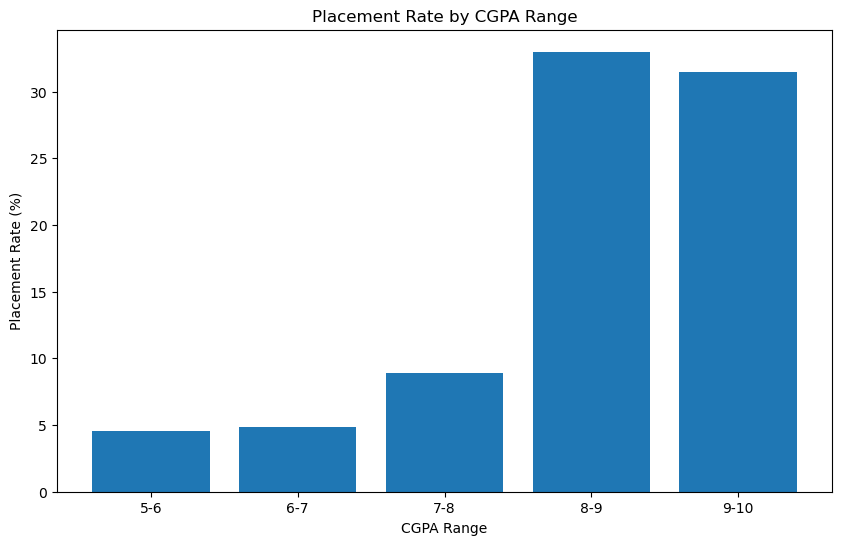

In [52]:
# Create CGPA bins
bins = [5, 6, 7, 8, 9, 10]
labels = ['5-6','6-7','7-8','8-9','9-10']
df['CGPA_bin'] = pd.cut(df['CGPA'], bins=bins, labels=labels, include_lowest=True)

# Placement rate per bin
placement_rate = df.groupby('CGPA_bin')['Placement'].apply(lambda x: (x=='yes').mean()*100)

plt.figure(figsize=(10,6))
plt.bar(placement_rate.index.astype(str), placement_rate.values)
plt.title("Placement Rate by CGPA Range")
plt.xlabel("CGPA Range")
plt.ylabel("Placement Rate (%)")
plt.show()


Visualizing a bar chart depicting how placement rates deflects with different CGPA levels. 

Grouping students by CGPA, by suing pd.cut making bins for CGPA values like 5-6,6-7.

Then placement percentage for specific bins are calculated and bar plot is visualized on basis of the values.

Q2. What is the relationship between internship experience and placement success?



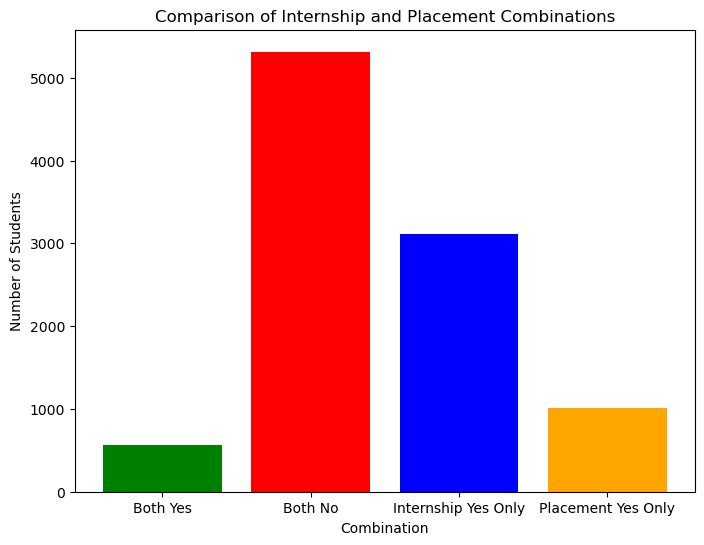

In [53]:
# Count each combination
comb_counts = {
    "Both Yes": len(df[(df['Internship_Experience'] == 'yes') & (df['Placement'] == 'yes')]),
    "Both No": len(df[(df['Internship_Experience'] == 'no') & (df['Placement'] == 'no')]),
    "Internship Yes Only": len(df[(df['Internship_Experience'] == 'yes') & (df['Placement'] == 'no')]),
    "Placement Yes Only": len(df[(df['Internship_Experience'] == 'no') & (df['Placement'] == 'yes')])
}

# Plot
plt.figure(figsize=(8,6))
plt.bar(comb_counts.keys(), comb_counts.values(), color=['green', 'red', 'blue', 'orange'])
plt.title("Comparison of Internship and Placement Combinations")
plt.ylabel("Number of Students")
plt.xlabel("Combination")
plt.show()

This code creates a bar chart to clearly show the relationship between internship experience and getting a job.

It works by first counting the number of students in four specific groups:

Students who had an internship AND were placed.

Students with no internship AND no placement.

Students who had an internship but were NOT placed.

Students who were placed despite having no internship.

Finally, it plots these four counts as bars. This allows you to visually compare the groups and quickly determine how strongly having an internship correlates with placement success.

Q3. Do students with higher IQ scores get placed more often?

 Visualization: Boxplot (IQ distribution for Placed vs Not Placed).

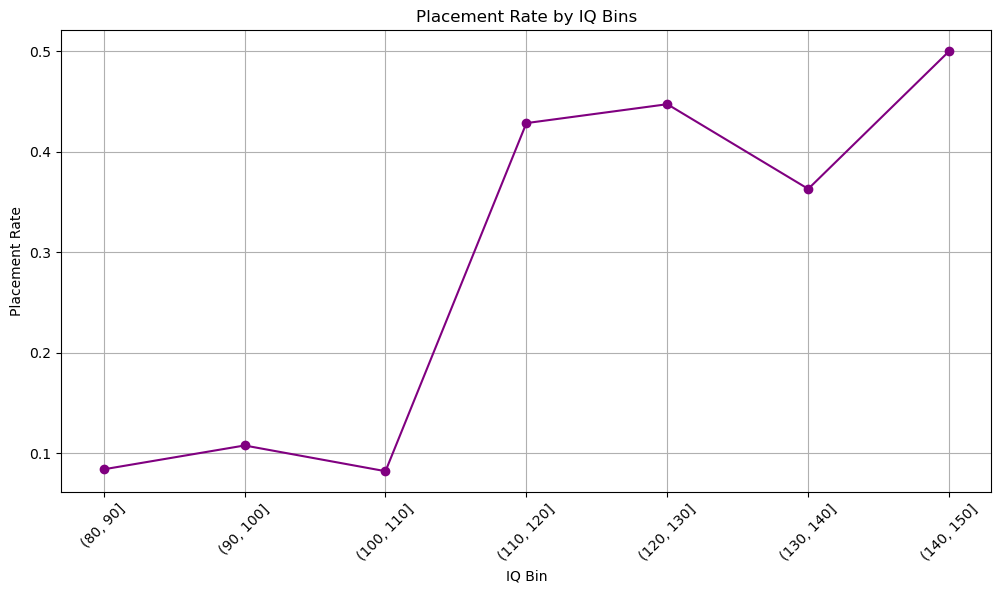

In [54]:
# Create IQ bins
df['IQ_bin'] = pd.cut(df['IQ'], bins=range(80, 151, 10))

placement_rate = df.groupby('IQ_bin', observed=True)['Placement'].apply(lambda x: (x=='yes').mean())

plt.figure(figsize=(12,6))
plt.plot(placement_rate.index.astype(str), placement_rate.values, marker='o', linestyle='-', color='purple')
plt.title("Placement Rate by IQ Bins")
plt.xlabel("IQ Bin")
plt.ylabel("Placement Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Now we are depicting a line plot showcasing the trend between a student's IQ and their placement rate.

Dividing the IQ values based on bins grouping students with same IQs in same groups.

Then calculating placement rates per group.

Eventually, visualize the data as a trend, clearly showing whether the placement rate consistently increases as the IQ range gets higher.

Q4. How do project completions influence placement chances across different CGPA levels?

 Visualization: Line chart (Average Projects Completed by CGPA, separate lines for Placeme

C:\Users\mehta\AppData\Local\Temp\ipykernel_26520\2524108539.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_projects_binned = df.groupby(['CGPA_bin','Placement'])['Projects_Completed'].mean().unstack()


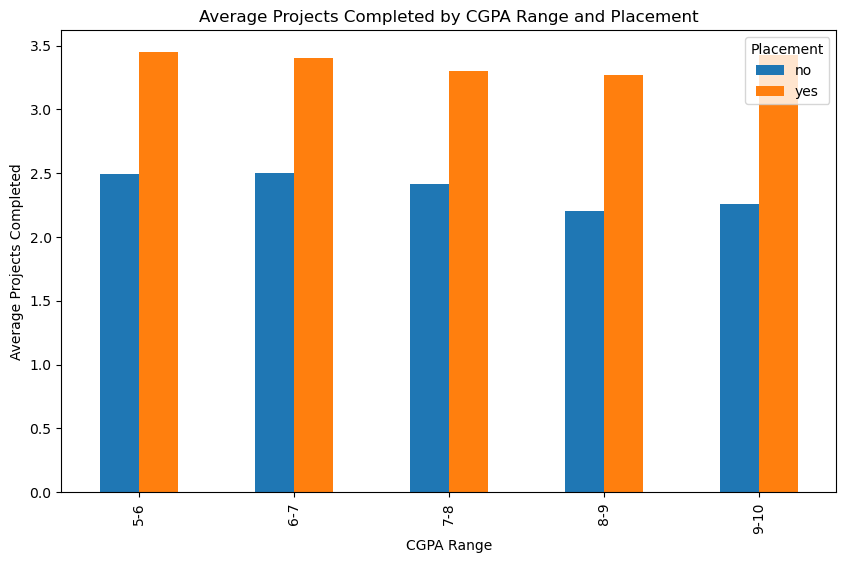

In [55]:
# Create CGPA bins
bins = [5, 6, 7, 8, 9, 10]
labels = ['5-6','6-7','7-8','8-9','9-10']
df['CGPA_bin'] = pd.cut(df['CGPA'], bins=bins, labels=labels, include_lowest=True)

# Average projects by CGPA bin and placement
avg_projects_binned = df.groupby(['CGPA_bin','Placement'])['Projects_Completed'].mean().unstack()

# Plot grouped bar chart
avg_projects_binned.plot(kind='bar', figsize=(10,6))
plt.title("Average Projects Completed by CGPA Range and Placement")
plt.xlabel("CGPA Range")
plt.ylabel("Average Projects Completed")
plt.legend(title="Placement")
plt.show()

This code creates a grouped bar chart to analyze how project completions relate to placement, specifically looking at different academic (CGPA) levels.
This code categorizes students according to CGPA (e.g. '7-8', '8-9') in order to contrast them with their academic counterparts.

Then calculating the average of number of projects made by students for two subgroups within specified range, for those who got placed and those who are not placed. 
 Finally, it creates a grouped bar chart to visualize these averages side-by-side. This clearly shows if, at every academic level, completing more projects is associated with getting a job.

Q5. Which combination of factors best predicts placement (CGPA, Internship, IQ, Projects)?

 Visualization: Correlation heatmap of numeric features (CGPA, IQ, Projects, Internship count, Project Rank, etc.).

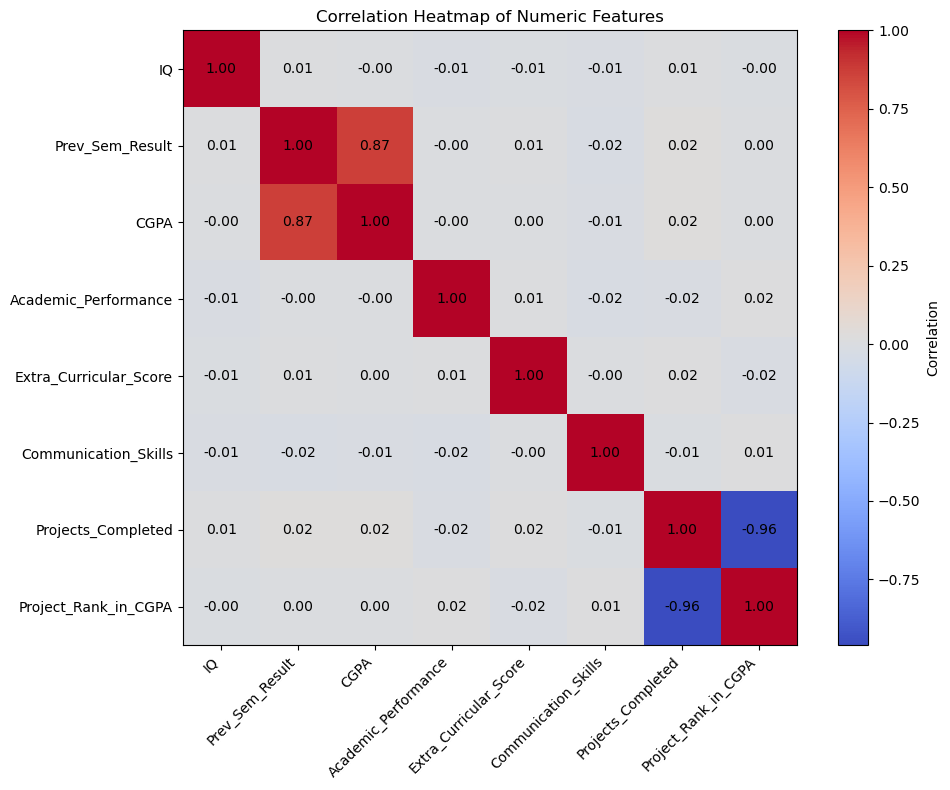

In [56]:
# Ensure numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'Project_Rank_in_CGPA' in df.columns and 'Project_Rank_in_CGPA' not in numeric_cols:
    numeric_cols.append('Project_Rank_in_CGPA')

corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')

# Labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)

# Annotate
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='black')

plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

Depicting a heatmap to showcase the strength and direction of the linear relationships between all the numeric features in your dataset.


First , for each pair of numerical values , a correlation coefficient is calculated. Then a grip of colored squares are visualized creating a heatmap. 

Warm colors (reds/oranges) and numbers close to +1 indicate a strong positive relationship (as one variable goes up, the other also tends to go up).

Cool colors (blues) and numbers close to -1 indicate a strong negative relationship (as one variable goes up, the other tends to go down).

Colors near the middle and numbers close to 0 mean there is little to no linear relationship.

Q6. What CGPA range has the highest number of total students vs placed students?

Visualization: Side-by-side bar chart (Total vs Placed counts by CGPA bins).

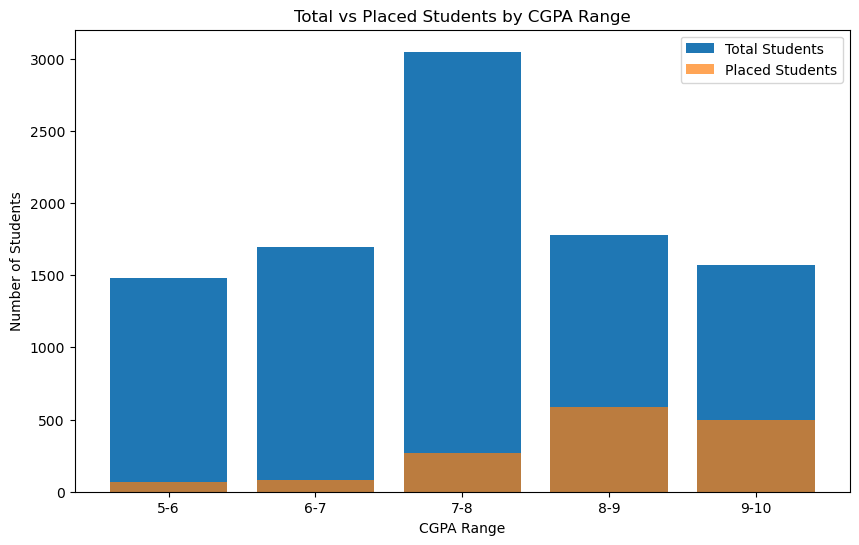

In [57]:
# Total students per CGPA bin
total_counts = df['CGPA_bin'].value_counts().sort_index()
placed_counts = df[df['Placement']=='yes']['CGPA_bin'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(total_counts.index, total_counts.values, label='Total Students')
plt.bar(placed_counts.index, placed_counts.values, label='Placed Students', alpha=0.7)
plt.title("Total vs Placed Students by CGPA Range")
plt.xlabel("CGPA Range")
plt.ylabel("Number of Students")
plt.legend()
plt.show()

This code creates an overlaid bar chart to compare the total number of students against the number of placed students within each CGPA range.

1. Count Two Groups: For each CGPA bin (e.g., '7-8', '8-9'), the code first counts the total number of students. It then performs a second count for the number of students who were successfully placed.

2. Plot Both on One Chart : It then visualizes both counts on a single bar chart. The 'Placed Students' bars are drawn on top of the 'Total Students' bars, allowing you to instantly see both the overall size of each CGPA group and the number of successful placements within it.

Q7. Do students with more projects completed have better chances of placement?

 Visualization: Line chart (Placement Rate by Project Count).

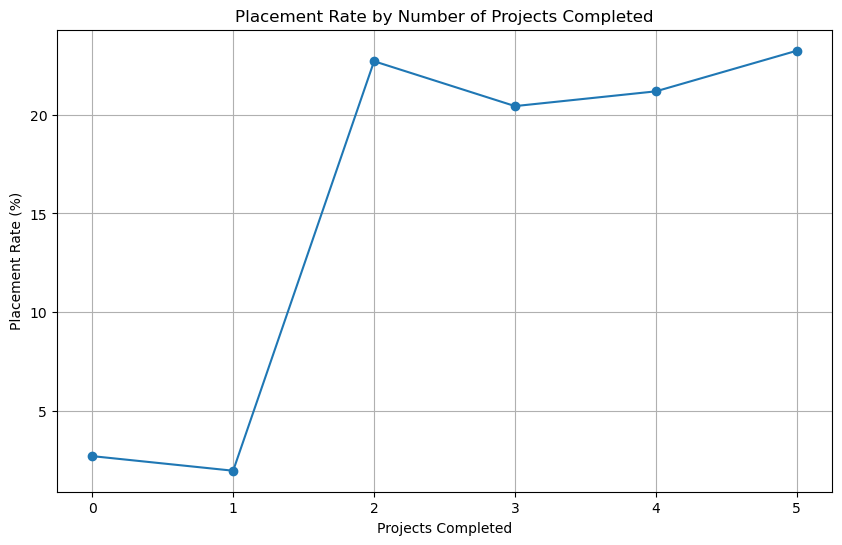

In [58]:
placement_rate_projects = df.groupby('Projects_Completed')['Placement'].apply(lambda x: (x=='yes').mean()*100)

plt.figure(figsize=(10,6))
plt.plot(placement_rate_projects.index, placement_rate_projects.values, marker='o')
plt.title("Placement Rate by Number of Projects Completed")
plt.xlabel("Projects Completed")
plt.ylabel("Placement Rate (%)")
plt.grid(True)
plt.show()

creating a line plot to show the direct relationship between the number of projects a student completes and their chance of getting a job.

1. Group by Project Count : The code first groups all students based on the exact number of projects they completed.

2. Calculate Placement Rate for Each Group : For each of these groups, it calculates the specific placement rate in percent.

3. Visualize the Trend with a Line Plot : It then plots these rates on a line chart. This effectively shows the trend, making it easy to see if the placement rate consistently increases as students complete more projects.

Q8. How are students distributed across different CGPA ranges?

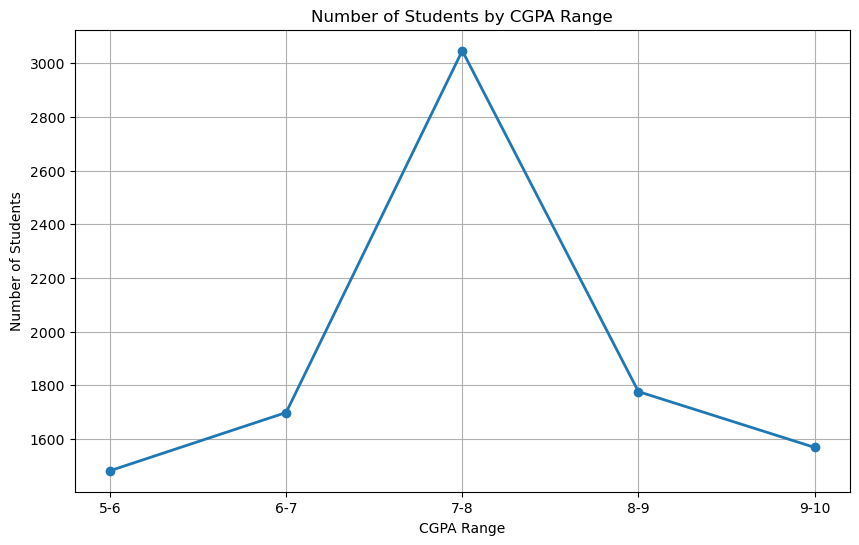

In [59]:
# Create CGPA bins
bins = [5, 6, 7, 8, 9, 10]
labels = ['5-6','6-7','7-8','8-9','9-10']
df['CGPA_bin'] = pd.cut(df['CGPA'], bins=bins, labels=labels, include_lowest=True)

# Count students per bin
cgpa_counts = df['CGPA_bin'].value_counts().sort_index()

# Line chart
plt.figure(figsize=(10,6))
plt.plot(cgpa_counts.index.astype(str), cgpa_counts.values, marker='o', linestyle='-', linewidth=2)
plt.title("Number of Students by CGPA Range")
plt.xlabel("CGPA Range")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

This code creates a line chart to show the distribution of students across different CGPA ranges.

1. Group Students by CGPA : First, it categorizes students into CGPA bins to group those with similar academic records.

2. Count Students in Each Group : Next, it counts the total number of students that fall into each of these CGPA bins.

3. Visualize the Distribution : Finally, it plots these counts as a line chart. This helps you quickly see which CGPA ranges are the most and least common, showing the overall academic distribution of the student population.

 Discussion & Conclusion 

This analysis confirms that while good grades are important, practical experience is the key differentiator for student placement. The data shows that employers value a holistic profile, prioritizing hands-on skills alongside academic achievement.

Key Findings:
Strong Academics Help: A high CGPA correlates with higher placement rates, but it is not a guarantee of success on its own.

Practical Skills are Critical: Internships and project completions are the most significant predictors, proving that employers value applied, hands-on experience.

Well-Rounded Candidates Win: Tangible achievements are valued more than raw metrics like IQ, indicating a preference for well-rounded individuals.

